In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Clustering_AbsenteeismAtWork_Data.csv',sep=';')

In [3]:
df.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
df.shape

(740, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
vc=pd.DataFrame()
for col in df.columns:
    vc[col]=pd.DataFrame(df[col].unique())

In [8]:
vc.iloc[:,6:]

,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,13.0,18.0,50.0,205.917,92.0,1.0,3.0,1.0,0.0,1.0,0.0,98.0,178.0,31.0,0.0
2,51.0,14.0,38.0,241.476,93.0,NaN,2.0,0.0,NaN,NaN,4.0,89.0,170.0,24.0,2.0
3,5.0,3.0,39.0,253.465,95.0,NaN,4.0,4.0,NaN,NaN,2.0,68.0,168.0,27.0,8.0
4,52.0,11.0,28.0,306.345,99.0,NaN,NaN,3.0,NaN,NaN,5.0,80.0,196.0,23.0,40.0
5,50.0,16.0,36.0,261.306,96.0,NaN,NaN,NaN,NaN,NaN,8.0,65.0,167.0,25.0,1.0
6,12.0,4.0,34.0,308.593,94.0,NaN,NaN,NaN,NaN,NaN,NaN,95.0,165.0,29.0,7.0
7,11.0,6.0,37.0,302.585,98.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,182.0,32.0,3.0
8,25.0,12.0,41.0,343.253,81.0,NaN,NaN,NaN,NaN,NaN,NaN,67.0,185.0,22.0,32.0
9,29.0,7.0,47.0,326.452,88.0,NaN,NaN,NaN,NaN,NaN,NaN,69.0,163.0,33.0,5.0


<AxesSubplot:>

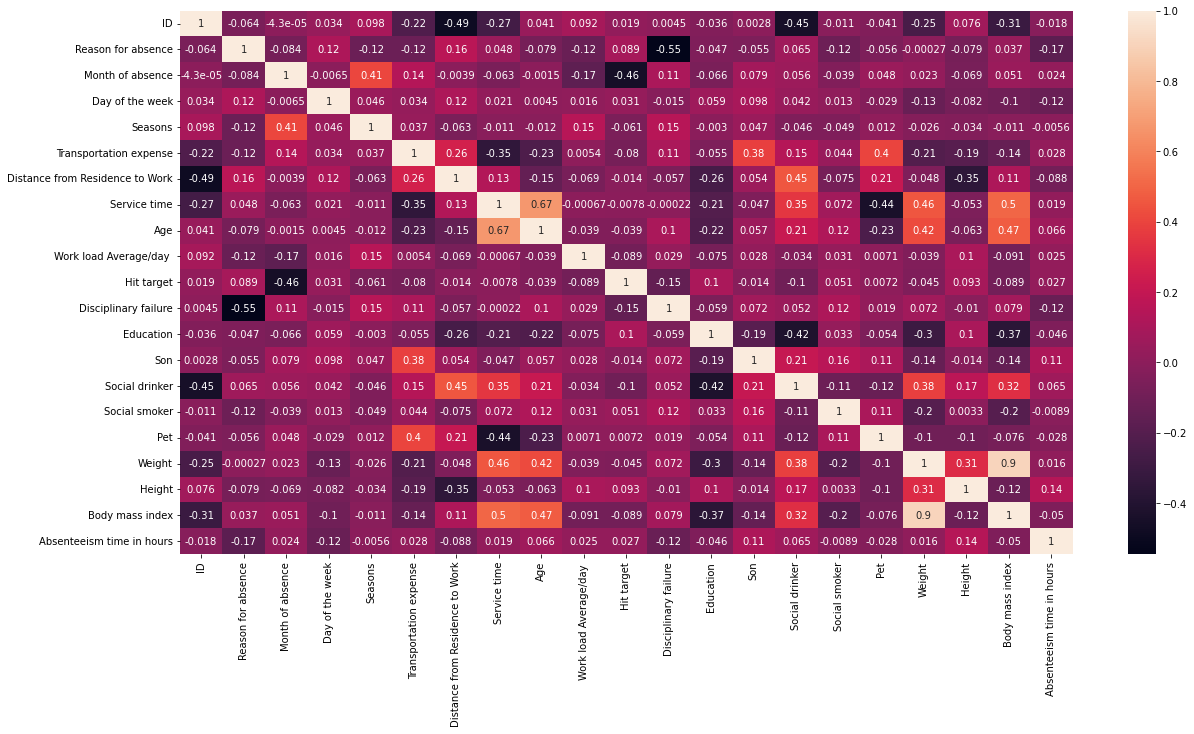

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
num=[]
cat=[]
for col in df.columns:
    if df[col].nunique()<9:
        cat.append(col)
    elif col=='ID':
        cat.append(col),
    elif col=='Reason for absence':
        cat.append(col),
    elif col=='Month of absence':
        cat.append(col)    
    else:
        num.append(col)
        

# EDA

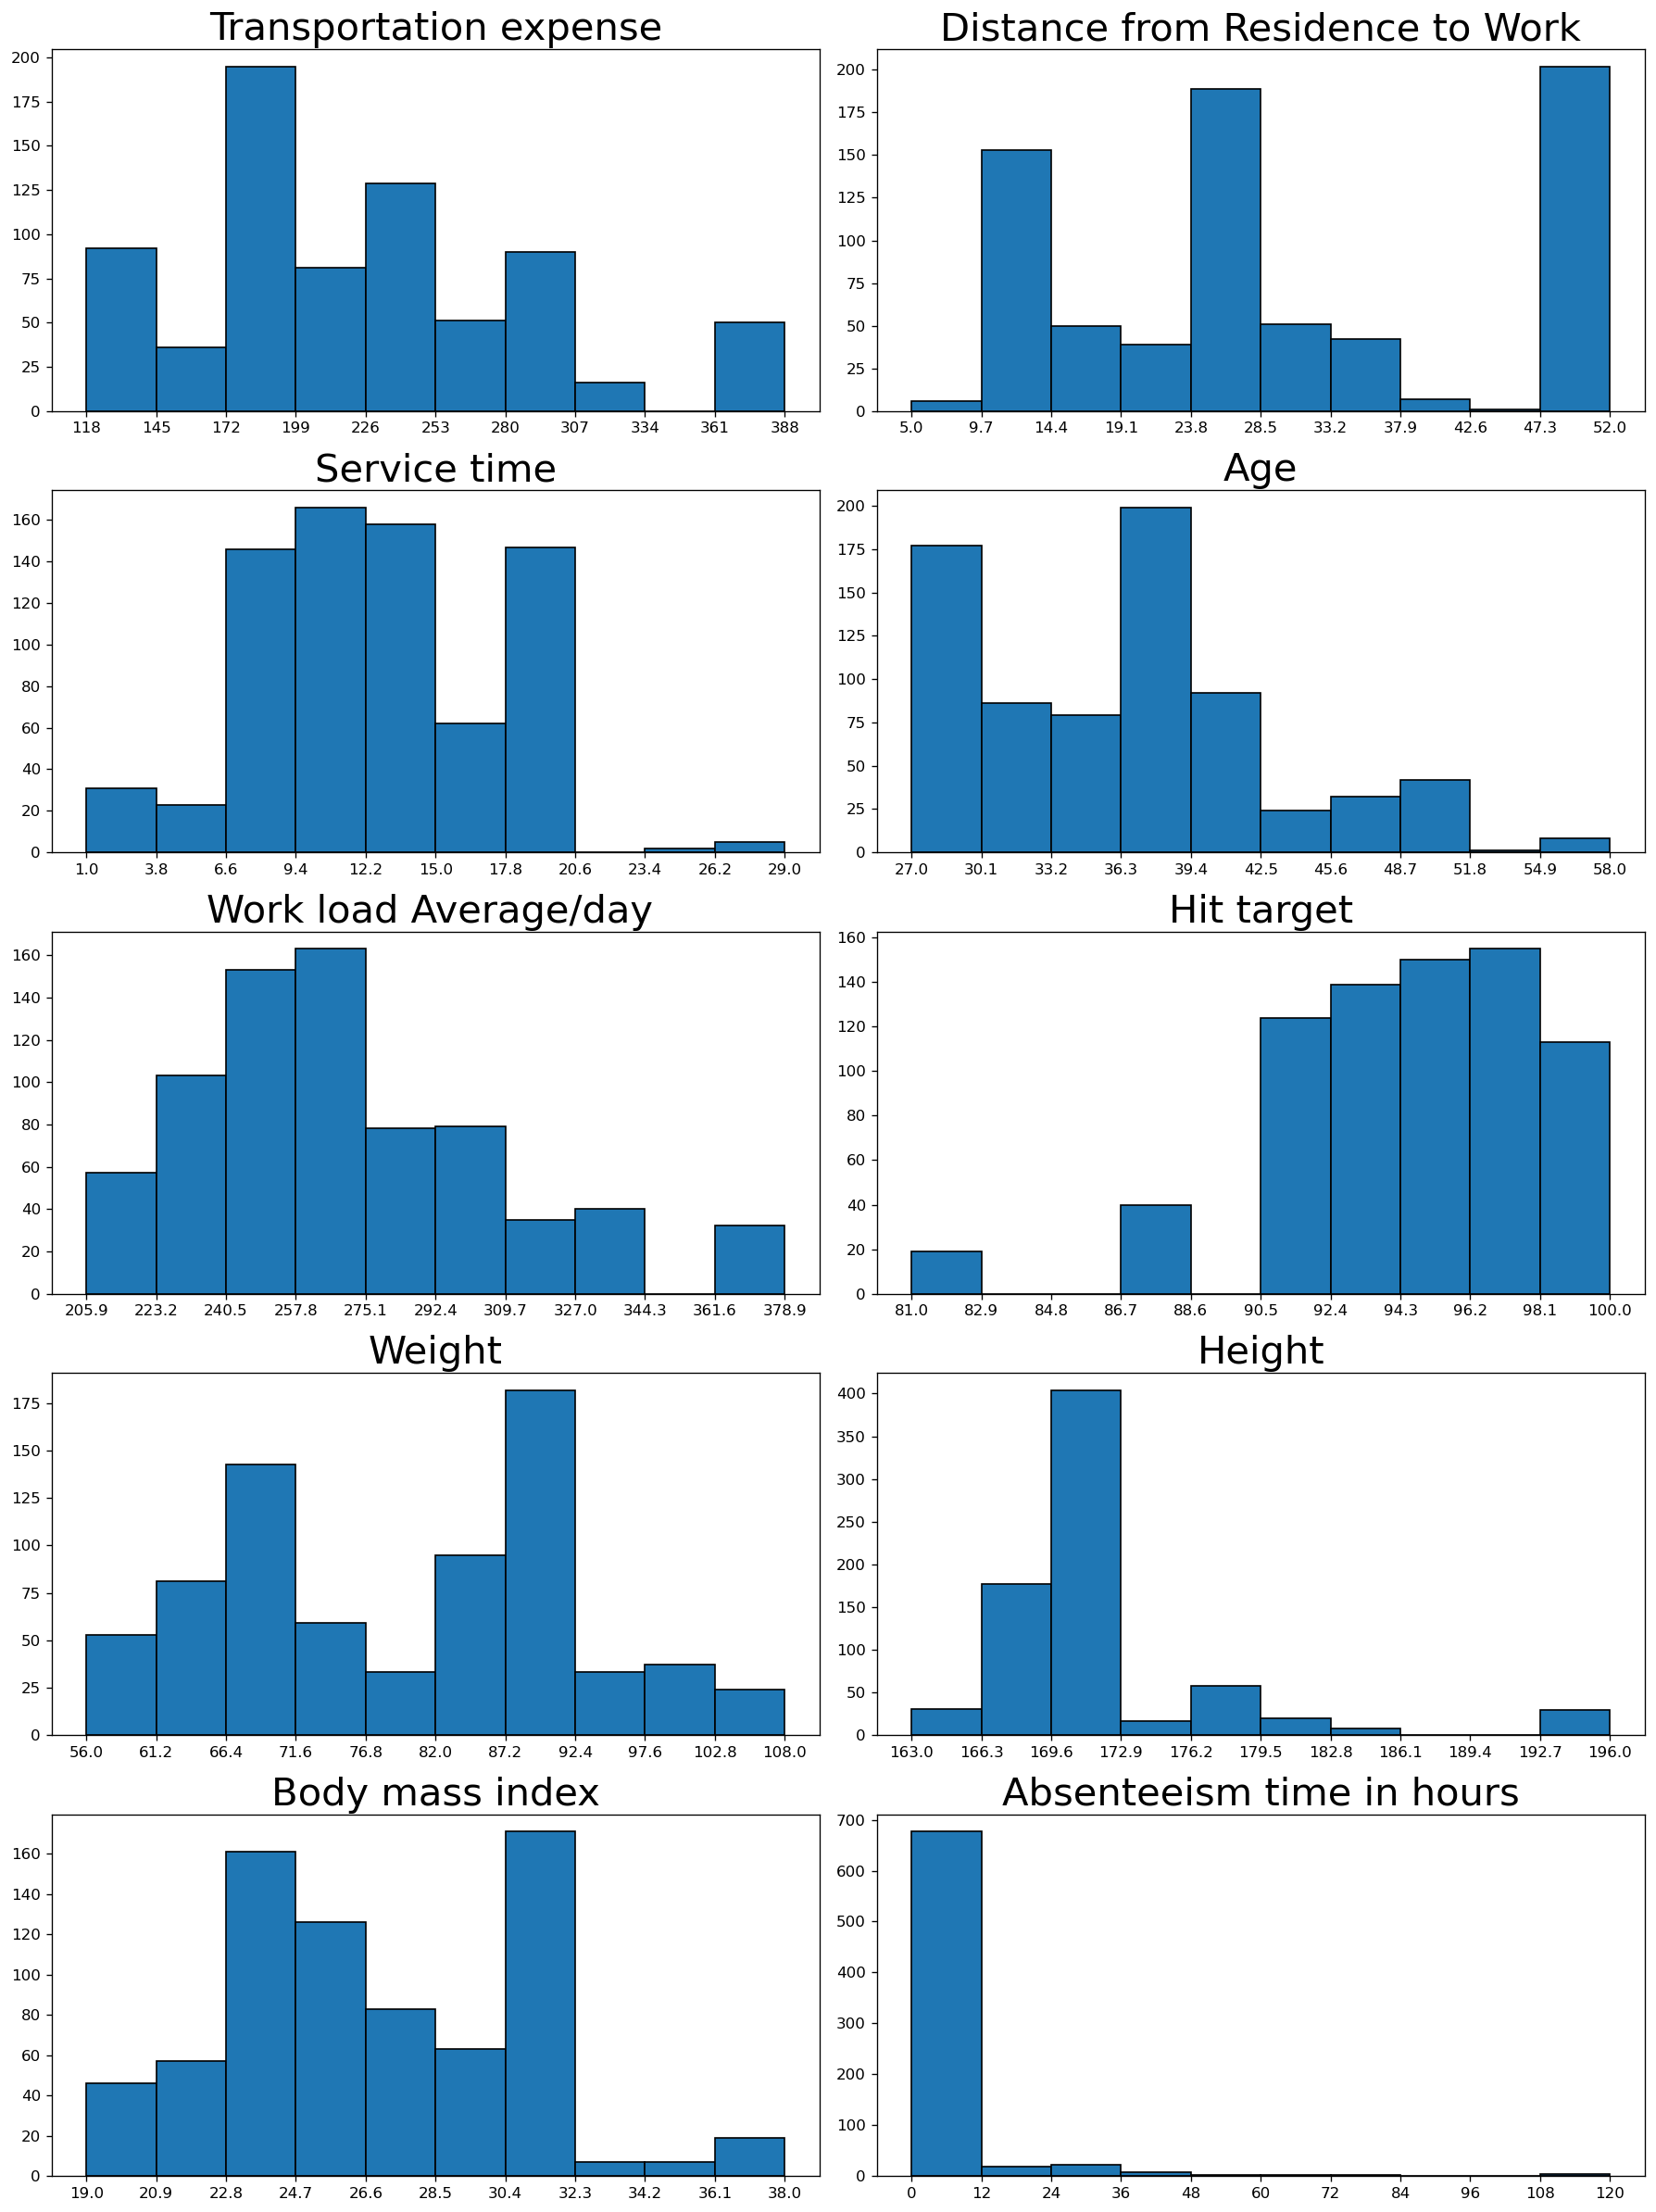

In [11]:
fgi,ax=plt.subplots(5,2,figsize=(15,20),dpi=120)
for col,i in zip(num,ax.flatten()):
    n,bins,patches=i.hist(df[col],edgecolor='black')
    i.set_xticks(bins)
    i.set_title(col,size=25)
    plt.tight_layout()

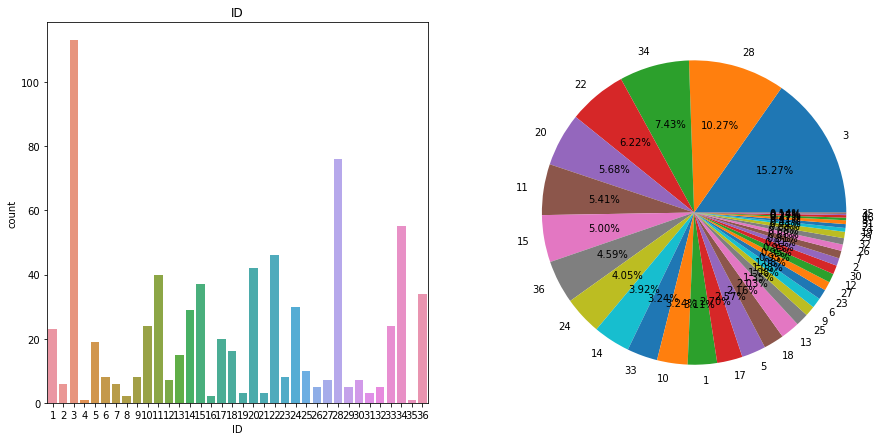

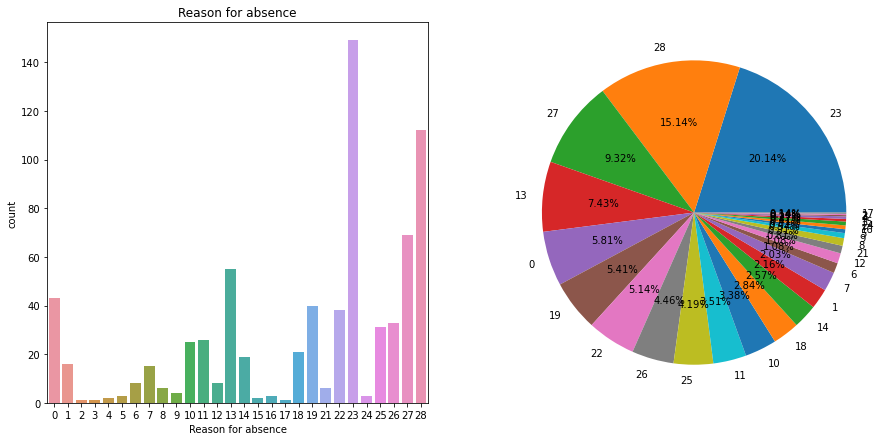

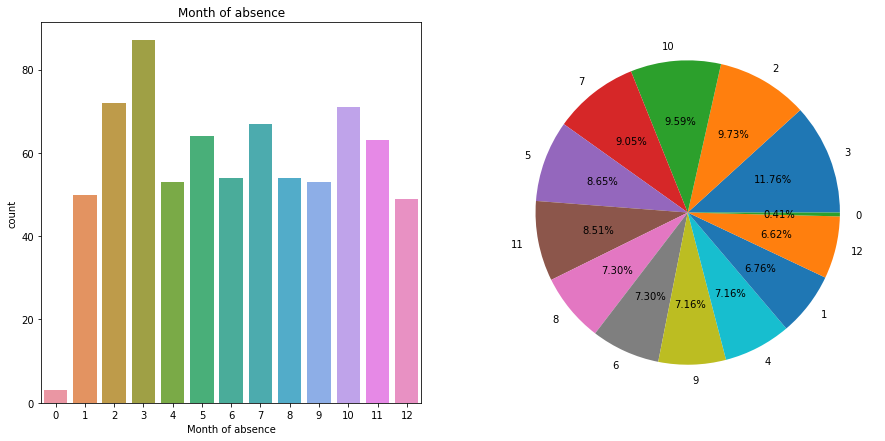

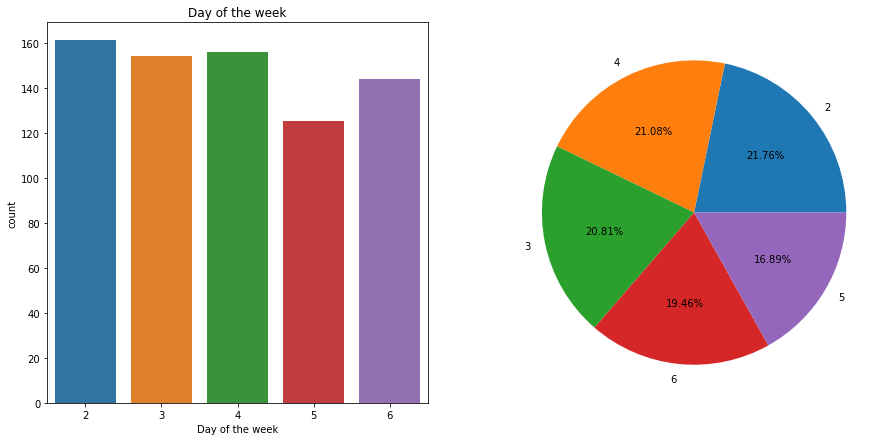

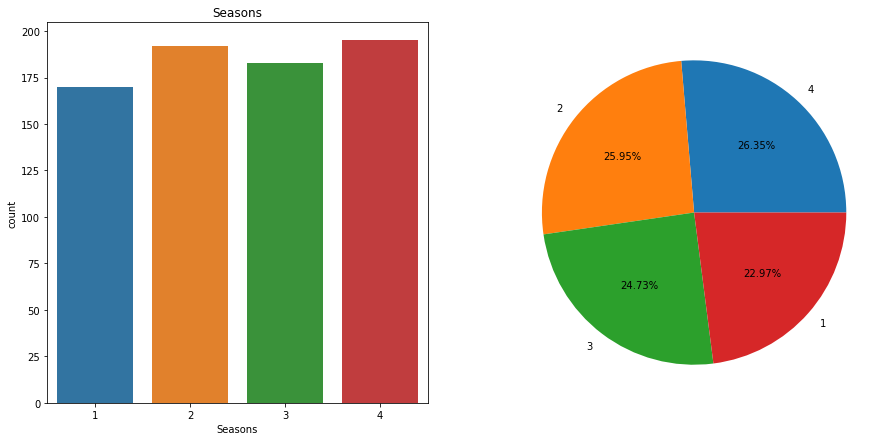

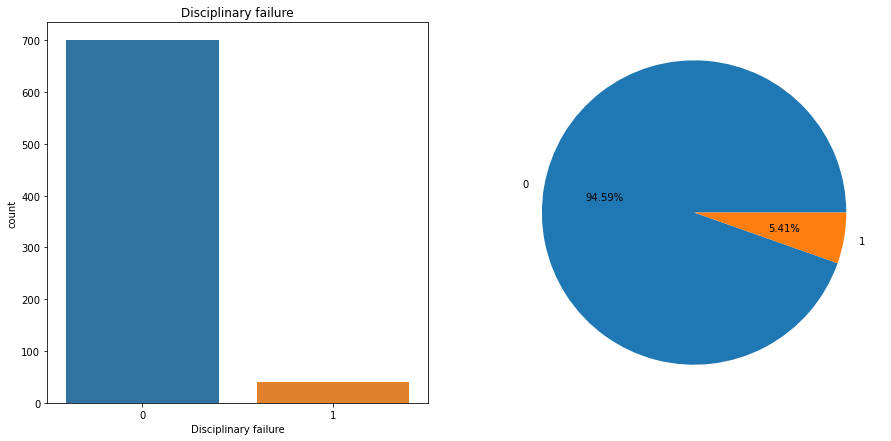

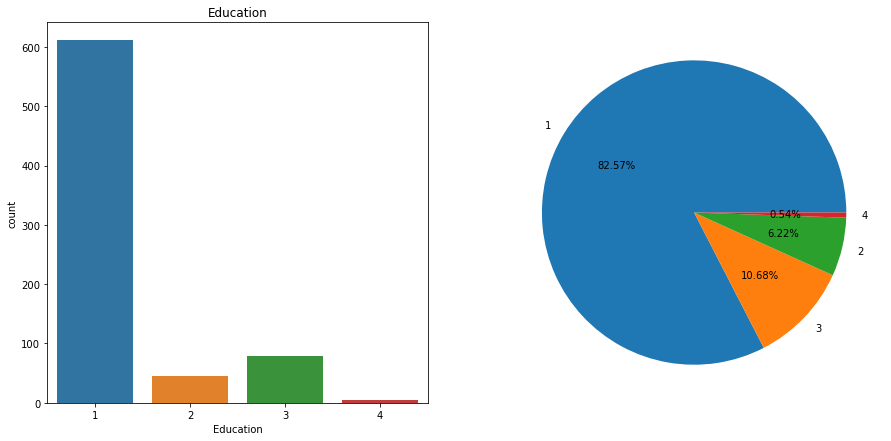

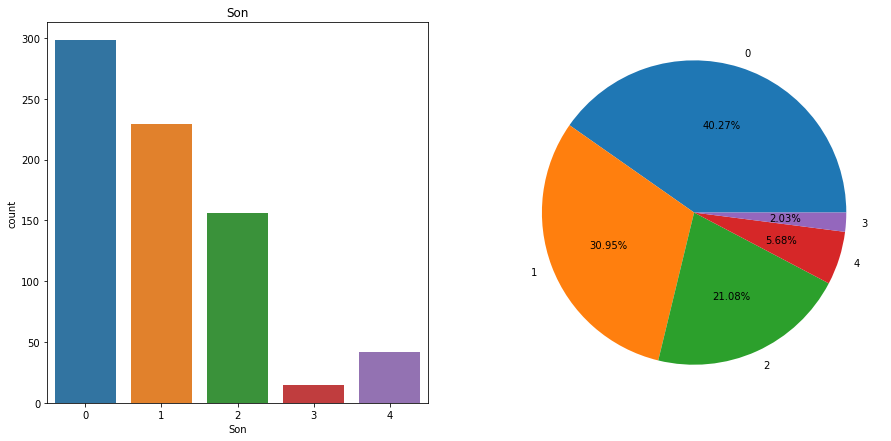

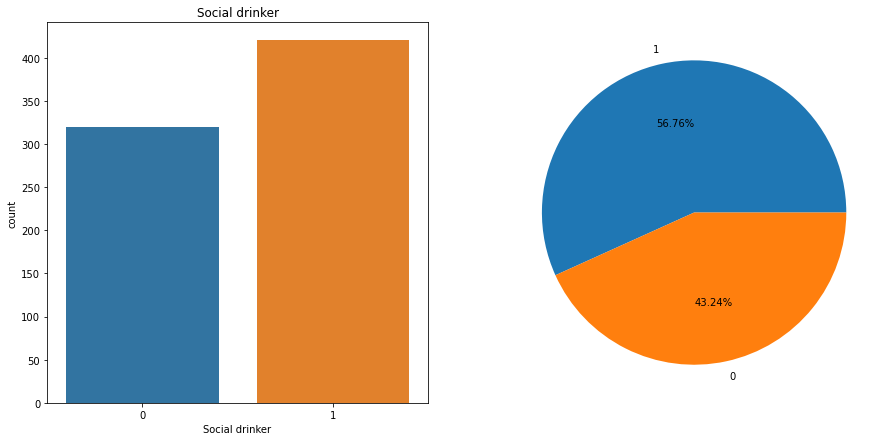

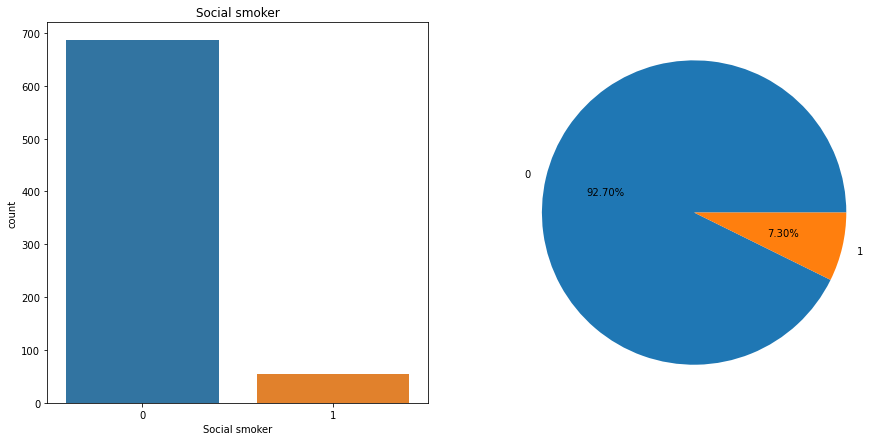

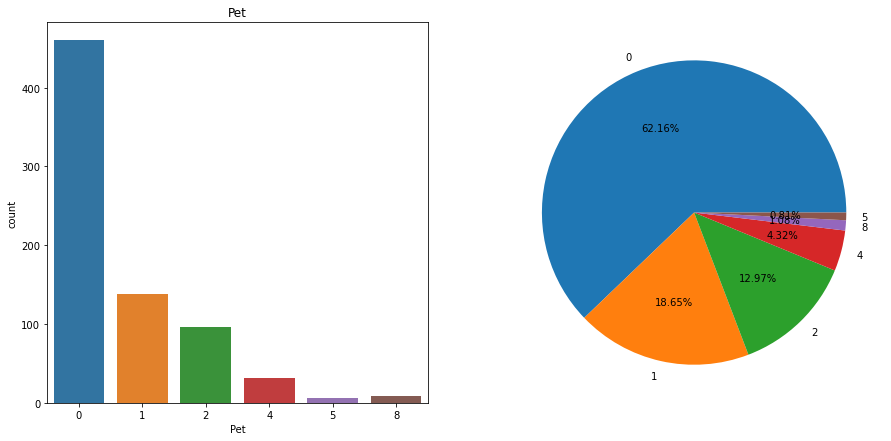

In [12]:
for col in cat:
    fig, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].set_title(col)                  
    percentage = df[col].value_counts()         
    labels = list(df[col].value_counts().index) 

    sns.countplot(x = df[col], ax = ax[0])
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%")

    plt.show()

# Conclusion
- Signs at most absenties are suffering from weekdays blues.
- Majority of them don't lack on disciplinary ground.
- Employees who drink are most likely to be absent.
- Smoking has low effect on absentism.


In [13]:
df_m=df.drop(['ID','Weight', 'Height','Seasons'],axis=1)

In [14]:
df_m.head(4)

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,0,7,3,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,23,7,4,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,5,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4


In [15]:
from sklearn import preprocessing
from sklearn import cluster
from sklearn.decomposition import PCA

In [16]:
scaler=preprocessing.MinMaxScaler()
df_s=pd.DataFrame(scaler.fit_transform(df_m),columns=df_m.columns)

In [17]:
df_s.head(3)

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.578947,0.033333
1,0.000000,0.583333,0.25,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.631579,0.000000
2,0.821429,0.583333,0.50,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.631579,0.016667


# Deciding pca components

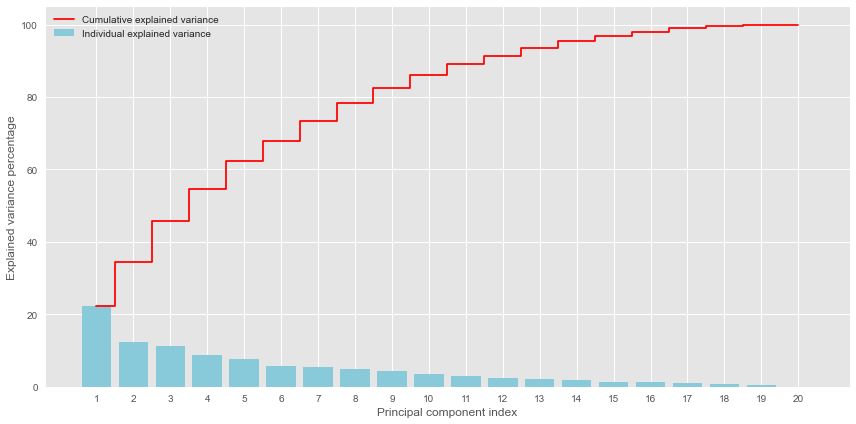

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(df_s)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 21), exp_var, align='center',
        label='Individual explained variance',color='c')

plt.step(range(1, 21), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(range(1, 21))
plt.legend(loc='best')
plt.tight_layout()

In [79]:
pca=PCA(n_components=4)
pca_df=pca.fit_transform(df_s)
pca_ratio=pca.explained_variance_ratio_
pca_ratio

array([0.25586056, 0.11796543, 0.10896921, 0.08912676])

In [80]:
pca_ratio.sum()

0.5719219567984148

# Although the Graph Suggests n_components above 12, using 4 for checking optimum model performance.

# KMeans

In [83]:
np.sqrt(len(df_s))

27.202941017470888

In [57]:
from sklearn.cluster import KMeans

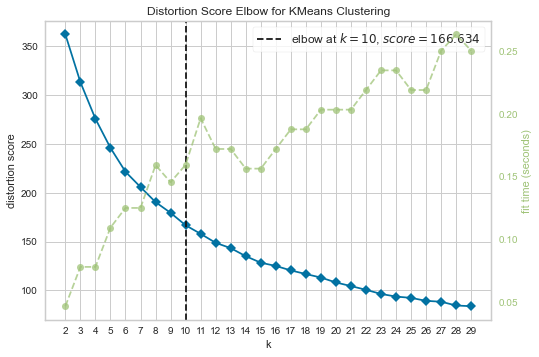

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(pca_df)        
plt.xticks(range(2,30))
visualizer.show()        

In [60]:
from sklearn.metrics import silhouette_score
for k in range(2,40):
    km=KMeans(n_clusters=k,random_state=42)
    label=km.fit_predict(pca_df)
    ss_avg=silhouette_score(pca_df,label)
    
    print('n_clusters:' ,k, 'Silhouette average:',ss_avg )    

n_clusters: 2 Silhouette average: 0.35606161222664423
n_clusters: 3 Silhouette average: 0.2883107750545885
n_clusters: 4 Silhouette average: 0.29222963119862855
n_clusters: 5 Silhouette average: 0.23191341746402036
n_clusters: 6 Silhouette average: 0.23076317433377022
n_clusters: 7 Silhouette average: 0.22647074307870568
n_clusters: 8 Silhouette average: 0.2220824047158583
n_clusters: 9 Silhouette average: 0.23005010031053763
n_clusters: 10 Silhouette average: 0.23456868139556353
n_clusters: 11 Silhouette average: 0.23764179383040943
n_clusters: 12 Silhouette average: 0.23313094978576915
n_clusters: 13 Silhouette average: 0.24723590699682235
n_clusters: 14 Silhouette average: 0.2573009916404889
n_clusters: 15 Silhouette average: 0.23920521990184648
n_clusters: 16 Silhouette average: 0.25374146187404845
n_clusters: 17 Silhouette average: 0.2538076459206584
n_clusters: 18 Silhouette average: 0.2600122194033357
n_clusters: 19 Silhouette average: 0.26025638024211206
n_clusters: 20 Silhouet

## n_clusters=4

In [66]:
num=['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Body mass index',
 'Absenteeism time in hours']
df_plot=df_m[[num]]
df_plot

In [159]:
km=KMeans(n_clusters=4,random_state=42)
km_l=km.fit_predict(pca_df)
df_m['km_l']=km_l
df_plot['km_l']=km_l

print(f'Model_performance: {silhouette_score(pca_df,km_l)}')

Model_performance: 0.33611128081205766


C:\Users\hp\AppData\Local\Temp\ipykernel_7024\3032377255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['km_l']=km_l


In [74]:
df_plot.head(3)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Body mass index,Absenteeism time in hours,km_l
0,289,36,13,33,239.554,97,30,4,0
1,118,13,18,50,239.554,97,31,0,3
2,179,51,18,38,239.554,97,31,2,2


In [155]:
pres=['Transportation expense','Distance from Residence to Work','Service time','Work load Average/day ']

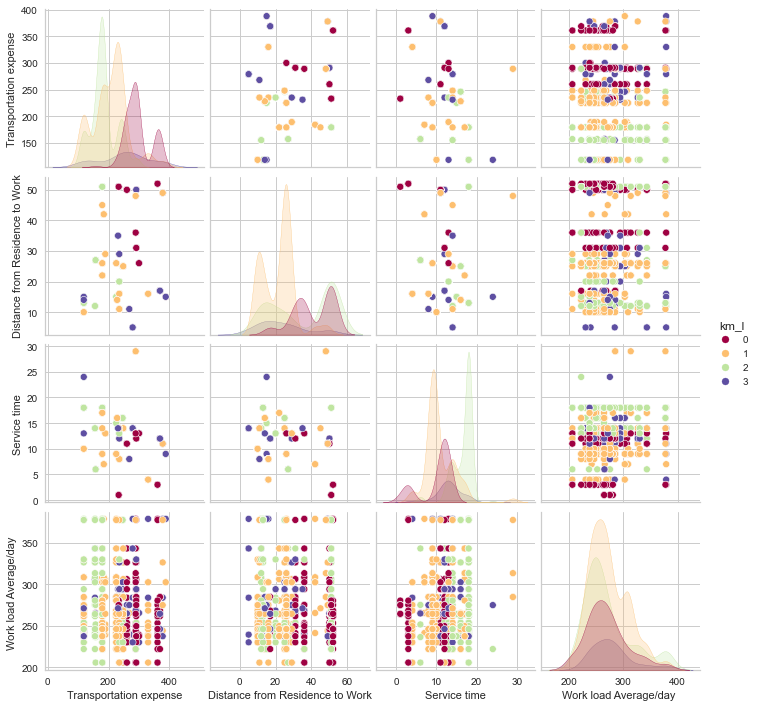

In [156]:
km_plot=sns.pairplot(df_plot,hue='km_l',palette='Spectral',vars=pres)

# Agglomerative Clustering

In [77]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

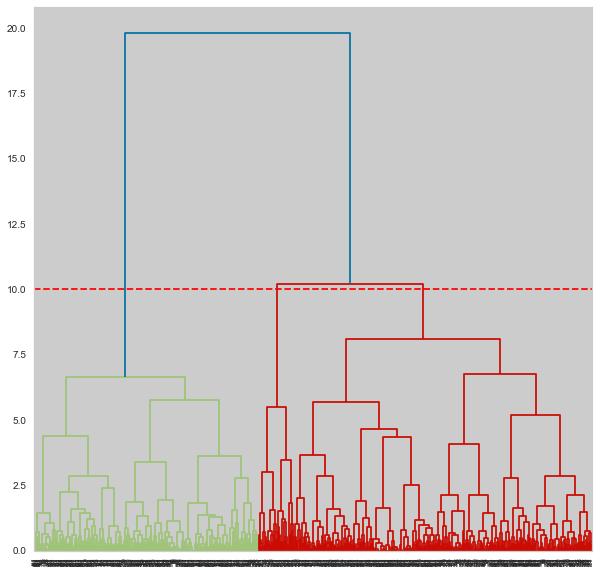

In [78]:
plt.figure(figsize=(10,10))
den=sch.dendrogram(sch.linkage(pca_df,method='ward'),labels=df_m.index)
plt.axhline(y=10,color='red',linestyle='--')

In [162]:
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
ac_l=ac.fit_predict(pca_df)
df_m['ac_l']=ac_l
df_plot['ac_l']=ac_l

print(f'Model_performance: {silhouette_score(pca_df,ac_l)}')

Model_performance: 0.4092612713081906


C:\Users\hp\AppData\Local\Temp\ipykernel_7024\1464860131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['ac_l']=ac_l


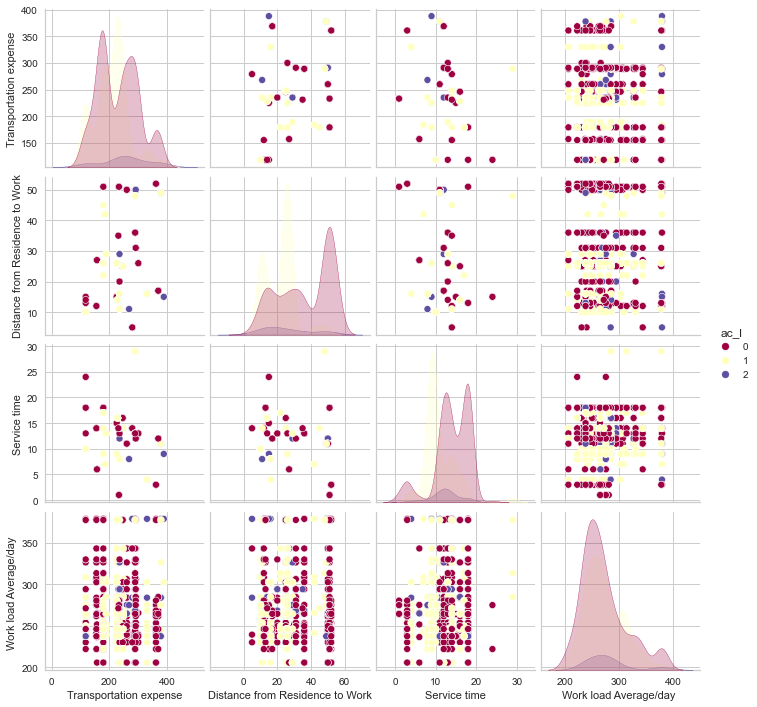

In [163]:
ac_plot=sns.pairplot(df_plot,hue='ac_l',palette='Spectral',vars=pres)

# DBSCAN

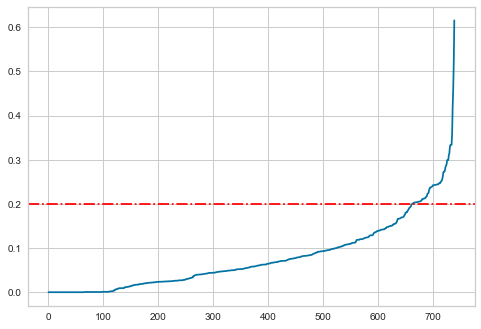

In [90]:
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2)
nndi=nn.fit(pca_df)
dis,ind=nndi.kneighbors(pca_df)
dis=np.sort(dis,axis=0)
dis=dis[:,1]

plt.plot(dis)
plt.axhline(y=0.2, color='red',linestyle='-.')

In [114]:
for ms in range(2,20):
    dbs=DBSCAN(eps=0.3,min_samples=ms)
    db_l=dbs.fit_predict(pca_df)
    a=db_l+2
    b=np.bincount(a)
    nz=np.nonzero(b)[0]
    res=list(zip(nz,b[nz]))
    print(f'min_sample {ms} and {res}')
    print('================================================================================================')

min_sample 2 and [(1, 11), (2, 392), (3, 4), (4, 301), (5, 11), (6, 4), (7, 4), (8, 2), (9, 2), (10, 2), (11, 5), (12, 2)]
min_sample 3 and [(1, 19), (2, 392), (3, 4), (4, 301), (5, 11), (6, 4), (7, 4), (8, 5)]
min_sample 4 and [(1, 20), (2, 392), (3, 4), (4, 301), (5, 10), (6, 4), (7, 5), (8, 4)]
min_sample 5 and [(1, 33), (2, 391), (3, 301), (4, 10), (5, 5)]
min_sample 6 and [(1, 39), (2, 391), (3, 301), (4, 9)]
min_sample 7 and [(1, 42), (2, 391), (3, 300), (4, 7)]
min_sample 8 and [(1, 53), (2, 388), (3, 299)]
min_sample 9 and [(1, 64), (2, 387), (3, 289)]
min_sample 10 and [(1, 66), (2, 386), (3, 288)]
min_sample 11 and [(1, 71), (2, 384), (3, 285)]
min_sample 12 and [(1, 78), (2, 358), (3, 283), (4, 21)]
min_sample 13 and [(1, 87), (2, 352), (3, 280), (4, 21)]
min_sample 14 and [(1, 93), (2, 349), (3, 277), (4, 21)]
min_sample 15 and [(1, 98), (2, 346), (3, 276), (4, 20)]
min_sample 16 and [(1, 109), (2, 343), (3, 267), (4, 21)]
min_sample 17 and [(1, 114), (2, 338), (3, 267), (4

In [161]:

db=DBSCAN(eps=0.3,min_samples=10)
db_l=db.fit_predict(pca_df)
df_m['db_l']=db_l
df_plot['db_l']=db_l

print(f'Model_performance: {silhouette_score(pca_df,db_l)}')

    

Model_performance: 0.384758519432052


C:\Users\hp\AppData\Local\Temp\ipykernel_7024\2202694630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['db_l']=db_l


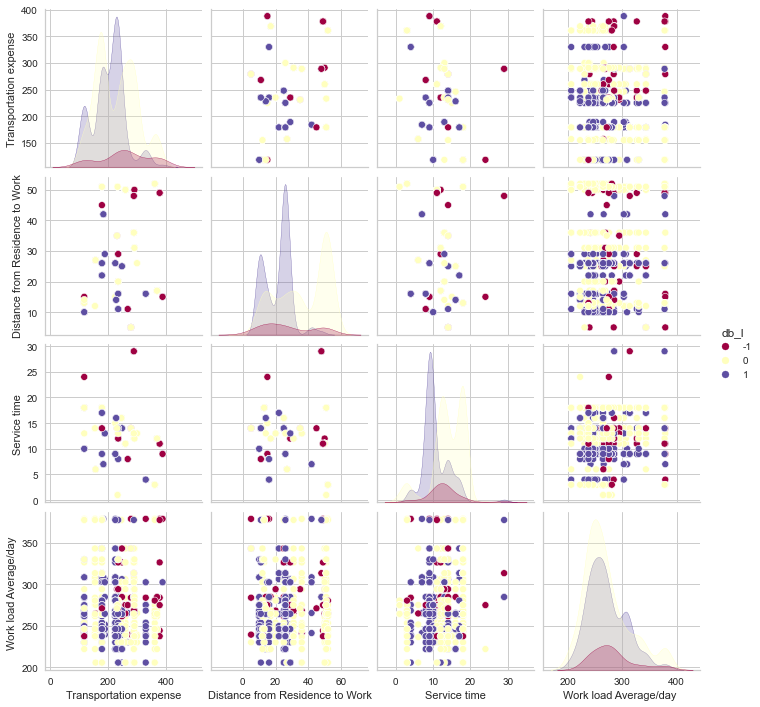

In [158]:
db_plot=sns.pairplot(df_plot,hue='db_l',palette="Spectral",vars=pres)

# Model Conlusion

In [164]:
pd.DataFrame({'Model':['KMeans','AG_Clustering','DBSCAN'],'Performance':[0.33611128081205766,0.4092612713081906,0.384758519432052]})

,Model,Performance
0,KMeans,0.336111
1,AG_Clustering,0.409261
2,DBSCAN,0.384759


# Aggomerative Clustering is Providing a good performance score and The clusters are visible clearly.

In [18]:
def clust(model='Agglomerative_Clustering',dimension_reduction ='pca',components=4):
    df_p1=df.drop(['ID','Weight', 'Height','Seasons'],axis=1)
    scaler=preprocessing.MinMaxScaler()
    df_s=pd.DataFrame(scaler.fit_transform(df_p1),columns=df_p1.columns)
    num=['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Body mass index','Absenteeism time in hours']
    pres=['Transportation expense','Distance from Residence to Work','Service time','Work load Average/day ','Absenteeism time in hours']
    
    
    #Dimensional Reduction Option
    if dimension_reduction == 'pca':
        pca=PCA(n_components=components)
        val=pca.fit_transform(df_s)      
    else:
        val = df_s
    
    #Chossing the Model
    if model == 'KMeans':
        cluster = KMeans(n_clusters=4,random_state=42).fit_predict(val)
        
    if model == 'Agglomerative_Clustering':
        cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward').fit_predict(val)
        
    else:
        cluster = DBSCAN(eps=0.3,min_samples=10).fit_predict(val)
        
    df_p1['cluster']=cluster
    df_p1['cluster'].unique()
    sns.pairplot(df_p1,hue='cluster',vars=pres,palette='Spectral')


    
#Interactive Control
from ipywidgets import interact
import ipywidgets as widgets    

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(clust 
             , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),('W', None)]
                                                  ,description='Dimensionality Reduction'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , components=widgets.SelectionSlider(options=range(1, 10), value=4,step=2
                                                ,description='Number components'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , model=widgets.RadioButtons(options=[('KMeans', KMeans())
                                                   ,('Agglomerative_Clustering', AgglomerativeClustering())
                                                   ,('DBSCAN', DBSCAN())]
                                                  ,description='model'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            )    
    

NameError: name 'KMeans' is not defined